# Display normalized images

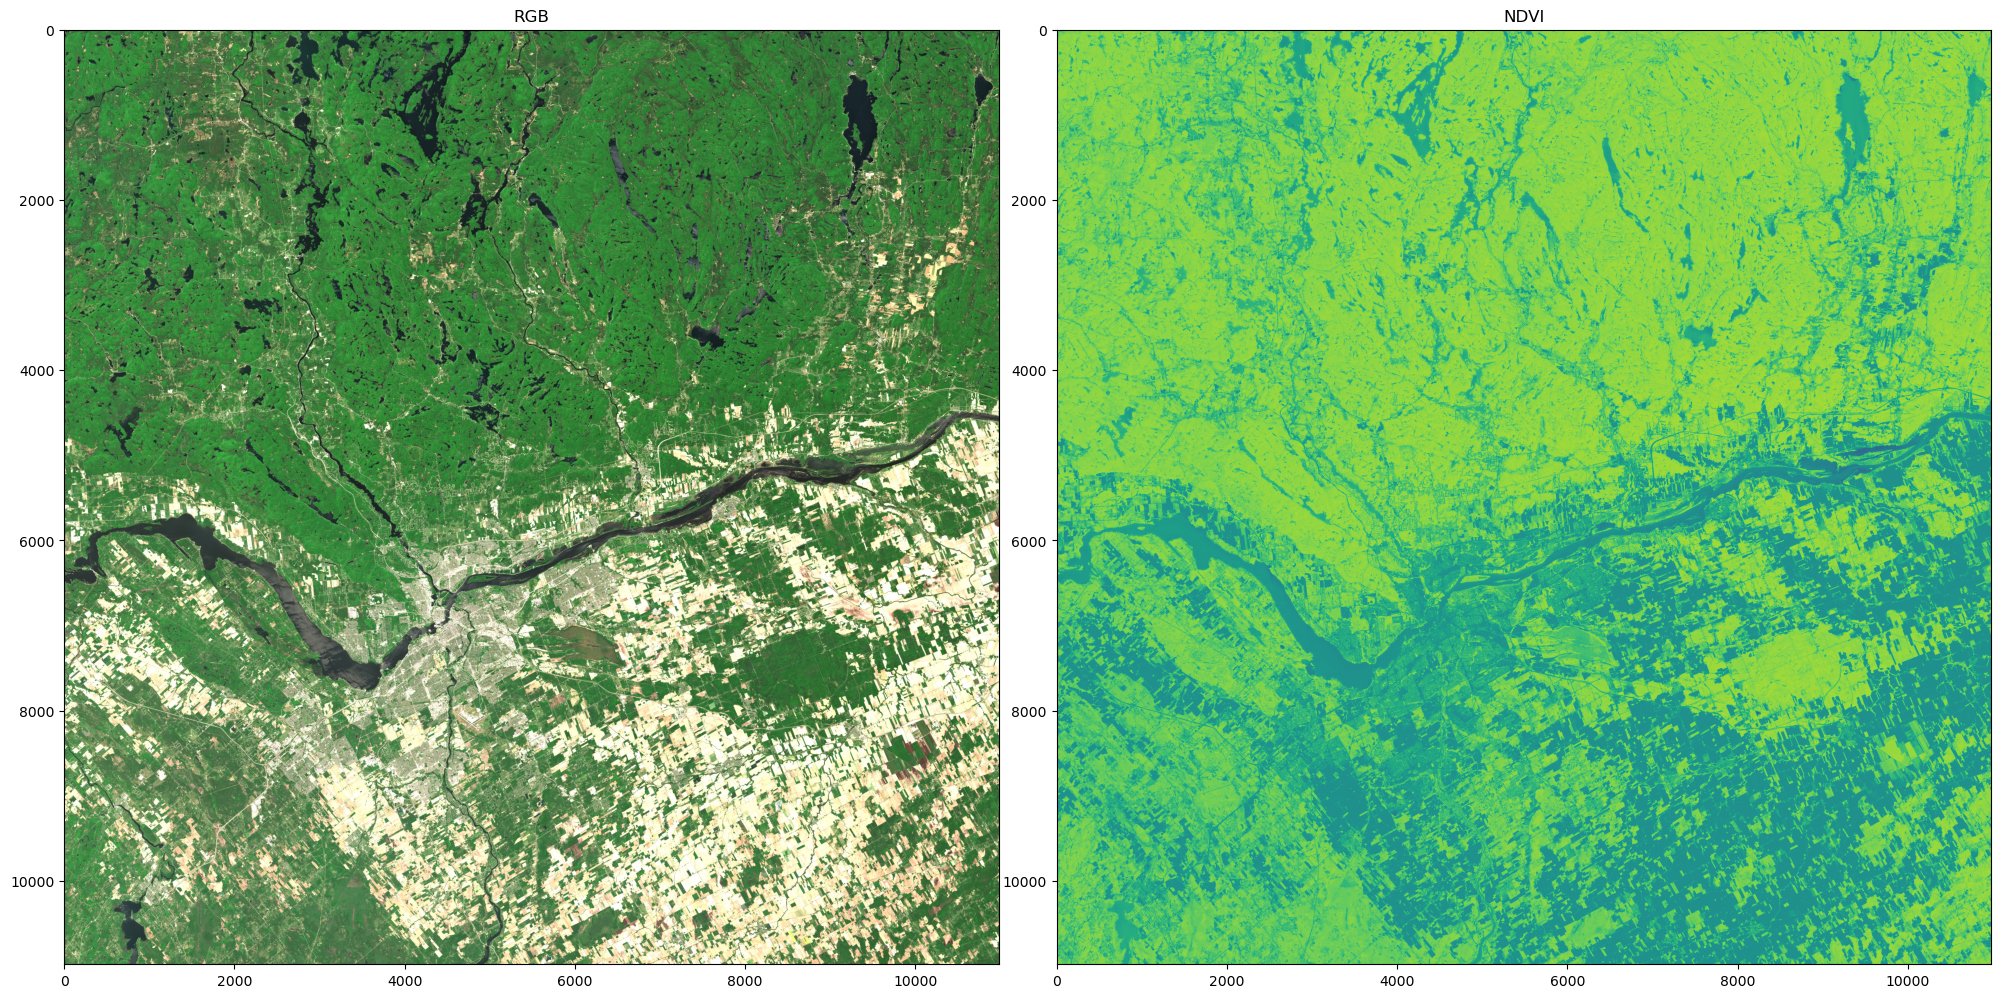

In [6]:
#displaying image after we downloaded all tiles

from pathlib import Path
import tifffile as tiff
import numpy as np
import cv2
import matplotlib.pyplot as plt


def display_images(image_dict):
    fig, axes = plt.subplots(1, 2, figsize=(20, 20))
    fig.tight_layout()          #adjusts padding between and around subplots

    for i, (title, image) in enumerate(image_dict.items()):
        axes[i].imshow(image)
        axes[i].set_title(title)

    plt.show()

def brighten(band):
    """Adjust image brightness using an alpha value (0 to 1). Higher alpha increases brightness, lower decreases."""
    
    alpha=0.2 # you can change this value 
    beta=0
    return np.clip(alpha*band+beta, 0,255)

def normalize(band: np.ndarray) -> np.ndarray:
    """
    First brighten the bands and then return normalized image 
    """
    band = brighten(band) 
    band_min, band_max = (band.min(), band.max())

    return ((band-band_min)/((band_max - band_min)))

def display_transformed_images(data_path: Path):
    """
    Generate Sentinel-2 images from the given filepath. The returned images are as follows:

    Note: If the input tile contains 0 values, a warning will be printed due to division by zero.

    NDVI: Normalized Difference Vegetation Index
    NDBI: Normalized Difference Built-up Index
    NDWI: Normalized Difference Water Index
    False Color: B08, B04, B03
    Mask: The class labels for each pixel
    """
    # Unpack the bands
    B02 = normalize(tiff.imread(f"{data_path}/B02.tif")) #blue
    B03 = normalize(tiff.imread(f"{data_path}/B03.tif")) #green
    B04 = normalize(tiff.imread(f"{data_path}/B04.tif")) # red
    B08 = normalize(tiff.imread(f"{data_path}/B08.tif")) # nir (Near Infrared)


    # Calculate NDVI (Normalized Difference Vegetation Index)
    NDVI = (B08 - B04) / (B08 + B04)

    # Create a color image using RGB bands

    RGB = np.dstack((B04, B03, B02))
   
    images = {
        "RGB": RGB,
        "NDVI": NDVI,   
    }

    display_images(images)

    return images

# replace data_path with your path 
data_path = Path("/Users/sonya/Desktop/University/work/EarthDailyNDVI/downloaded_tiles/S2A_18TVR_20230528_0_L2A/20230528")
images = display_transformed_images(data_path)